# Handle missing value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
##read the file
data=pd.read_csv("D:/INEURON_DATA/Dataset/data0/aug_train.csv")
data = data.replace(' ', np.nan)

data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [3]:
### replace > and < symbol from experience column
data["experience"] = data["experience"].str.replace(r'\D+', '', regex=True)

In [4]:
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,1,500-999,Pvt Ltd,2,97,0.0


In [5]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [7]:
# find categorical variables
data_cat = [c for c in data.columns if data[c].dtypes=='O']
data[data_cat].head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4


In [8]:
# find numerical variables
data_num = [c for c in data.columns if data[c].dtypes!='O']
data[data_num].head()

,enrollee_id,city_development_index,training_hours,target
0,8949,0.920,36,1.0
1,29725,0.776,47,0.0
2,11561,0.624,83,0.0
3,33241,0.789,52,1.0
4,666,0.767,8,0.0


In [9]:
# find categorical variables
data_cat = [c for c in data.columns if data[c].dtypes=='O']
data[data_cat].head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4


In [10]:
# calculate the percentage of missing values in each variable
data.isnull().mean().sort_values(ascending=True)
### removing observations with missing data

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
target                    0.000000
experience                0.003393
enrolled_university       0.020148
last_new_job              0.022080
education_level           0.024011
major_discipline          0.146832
gender                    0.235306
company_size              0.309949
company_type              0.320493
dtype: float64

In [11]:
## creating another data
data_new=data.dropna()

In [12]:
## let's see the difference betwwen the actual and new data
print('Number of total observations: {}'.format(len(data)))
print('Number of observations without nan values: {}'.format(len(data_new)))

Number of total observations: 19158
Number of observations without nan values: 8955


In [13]:
### performing mean imputation
!pip install feature-engine

In [14]:
import numpy as np
import pandas as pd
# to split the data sets
from sklearn.model_selection import train_test_split

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer

# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer



In [15]:
# let's separate into training and testing set
# we have done this to calculate the mean and median values in the train set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1), data['target'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((13410, 13), (5748, 13))

In [16]:
X_train.isnull().mean().sort_values(ascending=True)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
experience                0.003803
enrolled_university       0.020582
last_new_job              0.022222
education_level           0.024310
major_discipline          0.146160
gender                    0.232364
company_size              0.306786
company_type              0.317897
dtype: float64

In [17]:
#mean/median imputation
for var in ['enrollee_id','city_development_index']:
    value = X_train[var].median()
    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)

In [18]:
# now check again for missing values
X_train[['enrollee_id','city_development_index','training_hours']].isnull().sum()

enrollee_id               0
city_development_index    0
training_hours            0
dtype: int64

## Mean / Median imputation with Feature-engine


In [21]:
# let's separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1), data['target'], test_size=0.3, random_state=0)

In [64]:
# let's create a mean imputer

mean_imputer = MeanMedianImputer(imputation_method='mean',
                                   variables=['enrollee_id','training_hours'])

mean_imputer.fit(X_train)

MeanMedianImputer(imputation_method='mean',
                  variables=['enrollee_id', 'training_hours'])

In [65]:
# let's inspect the dictionary with the mappings for each variable
mean_imputer.imputer_dict_

{'enrollee_id': 16906.41938851603, 'training_hours': 65.01140939597316}

In [66]:
# transform the data
X_train = mean_imputer.transform(X_train)
X_test = mean_imputer.transform(X_test)

In [67]:
##now check again for missing values
X_train[['enrollee_id','city_development_index','training_hours']].isnull().sum()

enrollee_id               0
city_development_index    0
training_hours            0
dtype: int64

In [51]:
# to impute missing data with feature-engine
from feature_engine.imputation import CategoricalImputer

In [53]:
data_cat=[i for i in data.columns if data[i].dtypes=='O']

In [63]:
# replace NA in all categorical variables

for var in ['city','relevent_experience','experience','company_size','last_new_job']:

    value = X_train[var].mode()[0]

    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)

In [56]:
# check absence of missing values

X_train[['city','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','last_new_job']].isnull().sum()

city                   0
relevent_experience    0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_size           0
last_new_job           0
dtype: int64

## Replacing missing values by an arbitrary number

In [58]:
from feature_engine.imputation import ArbitraryNumberImputer

In [59]:
X_train.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.232364
relevent_experience       0.000000
enrolled_university       0.000000
education_level           0.000000
major_discipline          0.000000
experience                0.000000
company_size              0.000000
company_type              0.317897
last_new_job              0.000000
training_hours            0.000000
dtype: float64

In [60]:
# find the maximum value per variable
X_train[['enrollee_id','city_development_index','training_hours']].max()

enrollee_id               33380.000
city_development_index        0.949
training_hours              336.000
dtype: float64

In [61]:
## replace NAN values in gender variable
 ## we can also take any random value in place of max
X_train['gender'].fillna(max, inplace=True)
X_test['gender'].fillna(max, inplace=True)

In [62]:
# check absence of missing values
X_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type              4263
last_new_job                 0
training_hours               0
dtype: int64

## Adding a bespoke category with pandas

In [1]:
##read the file
data=pd.read_csv("D:/INEURON_DATA/Dataset/data0/aug_train.csv")
data

<IPython.core.display.Javascript object>

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [3]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1), data['target'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

<IPython.core.display.Javascript object>

((13410, 13), (5748, 13))

In [4]:
X_train.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.232364
relevent_experience       0.000000
enrolled_university       0.020582
education_level           0.024310
major_discipline          0.146160
experience                0.003803
company_size              0.306786
company_type              0.317897
last_new_job              0.022222
training_hours            0.000000
dtype: float64

In [5]:
# replace NA in some categorical variables

for var in ['city','relevent_experience','enrolled_university','education_level','major_discipline','experience']:

    X_train[var].fillna('Missing', inplace=True)
    X_test[var].fillna('Missing', inplace=True)

In [6]:
### check again for missing data
X_train.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.232364
relevent_experience       0.000000
enrolled_university       0.000000
education_level           0.000000
major_discipline          0.000000
experience                0.000000
company_size              0.306786
company_type              0.317897
last_new_job              0.022222
training_hours            0.000000
dtype: float64

### Replacing missing values by a value at the end of the distribution

In [7]:
from feature_engine.imputation import EndTailImputer

In [12]:
# replace NA in indicated numerical variables
# using inter-quantal range proximity rule 

for var in ['training_hours']:

    IQR = X_train[var].quantile(0.75) - X_train[var].quantile(0.25)
    value = X_train[var].quantile(0.75) + 1.5 * IQR

    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)

## Random Sample Imputation

In [22]:
from feature_engine.imputation import RandomSampleImputer

In [17]:
##read the file
data=pd.read_csv("D:/INEURON_DATA/Dataset/data1/Travel.csv")
data

<IPython.core.display.Javascript object>

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [39]:
data.isnull().mean()

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         0.046236
TypeofContact               0.005115
CityTier                    0.000000
DurationOfPitch             0.051350
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.009206
ProductPitched              0.000000
PreferredPropertyStar       0.005319
MaritalStatus               0.000000
NumberOfTrips               0.028642
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    0.013502
Designation                 0.000000
MonthlyIncome               0.047668
dtype: float64

In [19]:
data.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [20]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MonthlyIncome', axis=1), data['MonthlyIncome'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

<IPython.core.display.Javascript object>

((3421, 19), (1467, 19))

In [21]:
X_train.isnull().mean()

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         0.046185
TypeofContact               0.004969
CityTier                    0.000000
DurationOfPitch             0.050862
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.010231
ProductPitched              0.000000
PreferredPropertyStar       0.005554
MaritalStatus               0.000000
NumberOfTrips               0.026308
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    0.013446
Designation                 0.000000
dtype: float64

In [29]:
# let's create a random sample imputer

imputer = RandomSampleImputer()

imputer.fit(X_train)

RandomSampleImputer()

In [30]:
# transform the data - replace the missing values
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [31]:
# check that null values were replaced
X_train.isnull().mean()

CustomerID                  0.0
ProdTaken                   0.0
Age                         0.0
TypeofContact               0.0
CityTier                    0.0
DurationOfPitch             0.0
Occupation                  0.0
Gender                      0.0
NumberOfPersonVisiting      0.0
NumberOfFollowups           0.0
ProductPitched              0.0
PreferredPropertyStar       0.0
MaritalStatus               0.0
NumberOfTrips               0.0
Passport                    0.0
PitchSatisfactionScore      0.0
OwnCar                      0.0
NumberOfChildrenVisiting    0.0
Designation                 0.0
dtype: float64

## BinaryImputer

In [38]:
###AddNaNBinaryImputer is renamed as AddMissingIndicator
from feature_engine.imputation import AddMissingIndicator

In [40]:
##read the file
data=pd.read_csv("D:/INEURON_DATA/Dataset/data1/Travel.csv")
data

<IPython.core.display.Javascript object>

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [41]:
data.isnull().mean()

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         0.046236
TypeofContact               0.005115
CityTier                    0.000000
DurationOfPitch             0.051350
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.009206
ProductPitched              0.000000
PreferredPropertyStar       0.005319
MaritalStatus               0.000000
NumberOfTrips               0.028642
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    0.013502
Designation                 0.000000
MonthlyIncome               0.047668
dtype: float64

In [43]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('NumberOfChildrenVisiting', axis=1), data['NumberOfChildrenVisiting'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

<IPython.core.display.Javascript object>

((3421, 19), (1467, 19))

In [44]:
# find the percentage of missing data within those variables

X_train.isnull().mean()

CustomerID                0.000000
ProdTaken                 0.000000
Age                       0.046185
TypeofContact             0.004969
CityTier                  0.000000
DurationOfPitch           0.050862
Occupation                0.000000
Gender                    0.000000
NumberOfPersonVisiting    0.000000
NumberOfFollowups         0.010231
ProductPitched            0.000000
PreferredPropertyStar     0.005554
MaritalStatus             0.000000
NumberOfTrips             0.026308
Passport                  0.000000
PitchSatisfactionScore    0.000000
OwnCar                    0.000000
Designation               0.000000
MonthlyIncome             0.047939
dtype: float64

In [45]:
# add missing indicator

for var in ['Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar']:      
    X_train[var+'_NA'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_NA'] = np.where(X_test[var].isnull(), 1, 0)

    
# check the new missing indicator variables
X_train.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Occupation_NA,Gender_NA,NumberOfPersonVisiting_NA,NumberOfFollowups_NA,ProductPitched_NA,PreferredPropertyStar_NA
118,200118,0,36.0,Self Enquiry,1,9.0,Salaried,Female,2,3.0,...,2,1,Executive,17835.0,0,0,0,0,0,0
261,200261,0,38.0,Company Invited,3,8.0,Salaried,Male,2,4.0,...,5,1,Manager,20249.0,0,0,0,0,0,0
598,200598,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,...,3,0,Executive,NaN,0,0,0,0,0,0
2154,202154,0,40.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,...,4,0,Senior Manager,24705.0,0,0,0,0,0,0
905,200905,0,29.0,Self Enquiry,1,6.0,Salaried,Female,2,4.0,...,2,0,AVP,31124.0,0,0,0,0,0,0


In [48]:
# the mean of the missing indicator should be the same as the 
# percentage of missing values in the original variable

X_train['DurationOfPitch'].isnull().mean()

0.05086232095878398

In [ ]:
from sklearn.impute import KNNImputer

In [79]:
# find numerical variables
data_num = [c for c in data.columns if data[c].dtypes!='O']
data1=data[data_num]

In [80]:
data1

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,200004,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,204884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,204885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,204886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [81]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data1.drop('MonthlyIncome', axis=1), data1['MonthlyIncome'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

<IPython.core.display.Javascript object>

((3421, 13), (1467, 13))

In [82]:
X_train.isnull().mean()

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         0.046185
CityTier                    0.000000
DurationOfPitch             0.050862
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.010231
PreferredPropertyStar       0.005554
NumberOfTrips               0.026308
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    0.013446
dtype: float64

In [86]:
imputer_knn = KNNImputer(n_neighbors=5)
X_train_knn=imputer_knn.fit_transform(X_train)

In [87]:
predictors = [var for var in data1.columns if var !='MonthlyIncome']

In [88]:
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

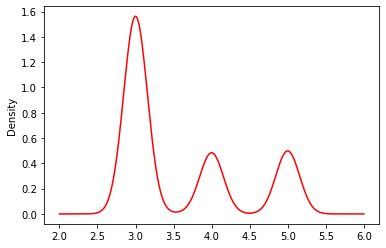

In [90]:
fig = plt.figure()
X_train_knn['PreferredPropertyStar'].plot(kind='kde', color='red')
# add legends
labels = ['KNN']
plt.show()